Kelompok:

- Raphael Alexander Lesmana
- Reynaldi Joely
- Bernard Hugo
- Alexander Ryan Wijaya

Sumber: https://www.kaggle.com/shivamb/5minute-crafts-video-views-dataset

Import library yang dibutuhkan:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Matikan notasi ilmiah ketika mencetak angka berkoma

In [2]:
pd.options.display.float_format = '{:.2f}'.format

Membaca file .csv yang berisi dataset:

In [3]:
df = pd.read_csv("5-Minute Crafts.csv")

Preprocessing: hitung baris yang duplicate:

In [4]:
df[df.duplicated()].shape

(0, 15)

Tidak ada baris yang memiliki duplicate, maka tidak ada baris yang perlu dihapus

Hitung baris dengan data kosong

In [5]:
df.isnull().sum()

video_id               0
title                  0
active_since_days      0
duration_seconds       0
total_views            0
num_chars              0
num_words              0
num_punctuation        0
num_words_uppercase    0
num_words_lowercase    0
num_stopwords          0
avg_word_len           0
contain_digits         0
startswith_digits      0
title_sentiment        0
dtype: int64

Tidak ada kolom yang memiliki data kosong

Kolom title_sentiment, active_since_days dan num_stopwrods tidak akan dipakai dalam data exploration, maka kolom tersebut bisa dihapus

In [6]:
df = df.drop(columns=["title_sentiment","num_stopwords","active_since_days"])

Ubah boolean (1/0) menjadi informasi yang lebih dapat dimengerti

In [7]:
def convert1(x):
    if x == 1:
        return "Contains digit(s)"
    else:
        return "Does not contain digits"
    
df["contain_digits"] = df["contain_digits"].apply(convert1)

In [8]:
def convert2(x):
    if x == 1:
        return "Starts with a digit"
    else:
        return "Does not start with a digit"
    
df["startswith_digits"] = df["startswith_digits"].apply(convert2)

Pisahkan data menjadi dua bagian; yang lebih kecil dari 25,000,000 views, dan yang lebih besar dari 25,000,000 views. Data dipisah karena jarak antara views makin besar ketika views makin besar juga

In [9]:
df_lt_25mil = df[df["total_views"] < 25000000]

In [10]:
df_gt_25mil = df[df["total_views"] > 25000000]

Lihat isi masing-masing data frame:

In [11]:
df_lt_25mil

,video_id,title,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,avg_word_len,contain_digits,startswith_digits
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,558,10825,45,8,3,1,4,5.62,Does not contain digits,Does not start with a digit
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,1020,184374,63,10,2,3,0,6.30,Does not contain digits,Does not start with a digit
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,629,478170,34,7,0,7,0,4.86,Does not contain digits,Does not start with a digit
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,41,197359,51,8,1,7,1,6.38,Does not contain digits,Does not start with a digit
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,784,162025,43,7,0,7,0,6.14,Does not contain digits,Does not start with a digit
...,...,...,...,...,...,...,...,...,...,...,...,...
4899,v=RA9GjoRhcSE,Amazing life hack; how to recycle old crayons ...,55,76086,63,11,2,2,8,5.73,Contains digit(s),Does not start with a digit
4900,v=KtetRv4kfog,How to DIY a magnetic memo holder l 5-MINUTE C...,52,68908,51,10,1,3,6,5.10,Contains digit(s),Does not start with a digit
4901,v=AEp338eSyDM,How to turn your old T-shirt into a pillowcase...,62,118541,76,14,5,4,7,5.43,Contains digit(s),Does not start with a digit
4902,v=JmFQavE0sPM,3 tricks to clean without harsh chemicals l 5-...,81,93121,59,10,1,2,7,5.90,Contains digit(s),Starts with a digit


In [113]:
df_gt_25mil

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
67,v=3exz6AKhtPs,GREATEST SUMMER HACKS FROM 5-MINUTE CRAFTS #sh...,30,60,39193365,50,7,2,6,1,1,7.14,Contains digit(s),0,1.00
78,v=80d4id92EV8,CRAZY HALLOWEEN MAKEUP IDEAS #shorts,30,57,44305373,36,5,1,4,1,0,7.20,Does not contain digits,0,-0.60
93,v=v9y3M5X2ua4,BEST SUMMER HACKS FOR SMART PARENTS #shorts,30,59,142635858,43,7,1,6,1,1,6.14,Does not contain digits,0,0.61
212,v=mMWoAV5IS18,Tik Tok STUNNING photo ideas #shorts,150,55,28673222,36,6,1,1,3,0,6.00,Does not contain digits,0,0.50
234,v=CjcVH96TnAs,Looks Awesome! Easy PHOTO HACKS Anyone Can Do ...,180,60,76836215,53,9,2,2,1,2,5.89,Does not contain digits,0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,v=dU5pcivkqqc,29 THINGS WE DO WRONG EVERY DAY,1460,485,62152743,31,7,0,6,0,2,4.43,Contains digit(s),1,-0.50
4687,v=VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,1460,625,27329157,62,10,1,0,0,3,6.20,Contains digit(s),1,0.90
4706,v=m4tJV078Qbw,19 COOLEST DIYs YOU CAN MAKE YOURSELF,1460,741,30031749,37,7,0,5,0,3,5.29,Contains digit(s),1,0.00
4722,v=LP_1VAcXoBM,19 FOOD HACKS THAT WILL BLOW YOUR MIND,1460,500,35947251,38,8,0,7,0,3,4.75,Contains digit(s),1,0.00


Reset index

In [12]:
df_lt_25mil = df_lt_25mil.reset_index()

In [13]:
df_gt_25mil = df_gt_25mil.reset_index()

Summary statistics:

In [14]:
df_lt_25mil[["duration_seconds", "total_views", "num_chars", "num_words"]].describe()

,duration_seconds,total_views,num_chars,num_words
count,4778.00,4778.00,4778.00,4778.00
mean,925.29,3201092.35,44.42,8.21
std,697.50,4368659.57,13.50,2.52
min,27.00,4034.00,11.00,3.00
25%,696.00,554766.00,35.00,6.00
50%,865.00,1391093.50,43.00,8.00
75%,960.00,3932647.75,52.00,10.00
max,14880.00,24751669.00,100.00,20.00


In [15]:
df_gt_25mil[["duration_seconds", "total_views", "num_chars", "num_words"]].describe()

,duration_seconds,total_views,num_chars,num_words
count,126.00,126.00,126.00,126.00
mean,1110.74,47180098.79,42.16,7.83
std,1312.66,32658406.92,11.72,2.27
min,51.00,25037978.00,19.00,4.00
25%,748.25,29572950.75,34.00,6.00
50%,900.00,39016602.50,41.50,8.00
75%,1140.00,49955063.25,48.75,9.00
max,10740.00,283031109.00,86.00,16.00


In [16]:
df[["duration_seconds", "total_views", "num_chars", "num_words"]].describe()

,duration_seconds,total_views,num_chars,num_words
count,4904.00,4904.00,4904.00,4904.00
mean,930.06,4331058.66,44.36,8.20
std,720.27,9706409.31,13.46,2.51
min,27.00,4034.00,11.00,3.00
25%,697.00,567791.00,35.00,6.00
50%,866.00,1459397.00,43.00,8.00
75%,960.00,4298147.50,51.00,10.00
max,14880.00,283031109.00,100.00,20.00


In [17]:
print("Modus (< 25 juta views)")
print(df_lt_25mil[["num_chars", "num_words", "num_punctuation", "num_words_uppercase", "num_words_lowercase"]].mode())

Modus (< 25 juta views)
   num_chars  num_words  num_punctuation  num_words_uppercase  \
0         40          8                0                    7   

   num_words_lowercase  
0                    0  


In [18]:
print("Modus (> 25 juta views)")
print(df_gt_25mil[["num_chars", "num_words", "num_punctuation", "num_words_uppercase", "num_words_lowercase"]].mode())

Modus (> 25 juta views)
   num_chars  num_words  num_punctuation  num_words_uppercase  \
0         30       8.00             0.00                 7.00   
1         37        NaN              NaN                  NaN   
2         42        NaN              NaN                  NaN   
3         44        NaN              NaN                  NaN   
4         46        NaN              NaN                  NaN   

   num_words_lowercase  
0                 0.00  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  


Cari video dengan jumlah penonton terbanyak

In [19]:
df.loc[df["total_views"].idxmax()]

video_id                                                  v=_9YMpuLDnwo
title                  42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE
duration_seconds                                                   1080
total_views                                                   283031109
num_chars                                                            48
num_words                                                            10
num_punctuation                                                       0
num_words_uppercase                                                   9
num_words_lowercase                                                   0
avg_word_len                                                       4.80
contain_digits                                        Contains digit(s)
startswith_digits                                   Starts with a digit
Name: 3850, dtype: object

Cari video dengan jumlah penonton paling kecil

In [7]:
df.loc[df["total_views"].idxmin()]

video_id                                                   v=BlBYzja1ZbU
title                  5 clothespin hacks that will make your life SO...
duration_seconds                                                      58
total_views                                                         4034
num_chars                                                             77
num_words                                                             14
num_punctuation                                                        2
num_words_uppercase                                                    3
num_words_lowercase                                                   10
avg_word_len                                                        5.50
contain_digits                                                         1
startswith_digits                                                      1
Name: 4783, dtype: object

Cari video yang paling panjang durasinya

In [20]:
df.loc[df["duration_seconds"].idxmax()]

video_id                                                   v=Kd3fBrj2cRA
title                  REAL LIVE || Shooting Stunning Science Experim...
duration_seconds                                                   14880
total_views                                                       424342
num_chars                                                             50
num_words                                                              7
num_punctuation                                                        2
num_words_uppercase                                                    2
num_words_lowercase                                                    0
avg_word_len                                                        7.14
contain_digits                                   Does not contain digits
startswith_digits                            Does not start with a digit
Name: 205, dtype: object

Cari video dengan durasi terpendek

In [8]:
df.loc[df["duration_seconds"].idxmin()]

video_id                                                   v=RsQaojbgeY0
title                  Simple mathematics trick to fool everyone l 5-...
duration_seconds                                                      27
total_views                                                        21067
num_chars                                                             59
num_words                                                              9
num_punctuation                                                        1
num_words_uppercase                                                    2
num_words_lowercase                                                    6
avg_word_len                                                        6.56
contain_digits                                                         1
startswith_digits                                                      0
Name: 4847, dtype: object

Cari video dengan judul paling panjang

In [21]:
df.loc[df["num_chars"].idxmax()]

video_id                                                   v=FwdmGwyvpRA
title                  100+ SMART PARENTING HACKS AND CRAFTS || DIY I...
duration_seconds                                                    7080
total_views                                                      2124054
num_chars                                                            100
num_words                                                             18
num_punctuation                                                        3
num_words_uppercase                                                    6
num_words_lowercase                                                    1
avg_word_len                                                        5.56
contain_digits                                         Contains digit(s)
startswith_digits                                    Starts with a digit
Name: 247, dtype: object

In [86]:
df.loc[df["num_chars"].idxmax()]["title"]

'100+ SMART PARENTING HACKS AND CRAFTS || DIY Ideas And Easy Activities Every Mom and Dad Should Know'

Cari video dengan judul terpendek

In [10]:
df.loc[df["num_chars"].idxmin()]

video_id               v=jQSIfiibjWc
title                    MOM VS. DAD
duration_seconds                 560
total_views                  6146074
num_chars                         11
num_words                          3
num_punctuation                    1
num_words_uppercase                3
num_words_lowercase                0
avg_word_len                    3.67
contain_digits                     0
startswith_digits                  0
Name: 1953, dtype: object

Buat histogram plot dari total_views

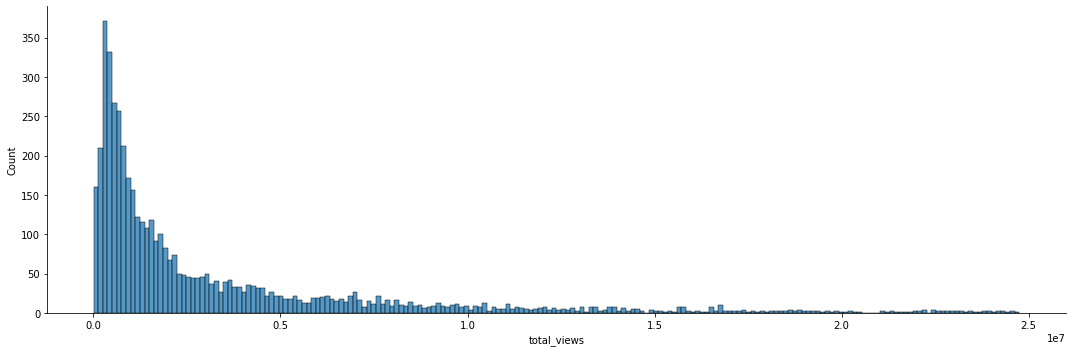

In [41]:
sns.displot(df_lt_25mil, x="total_views", kind="hist", aspect=3, bins=200)

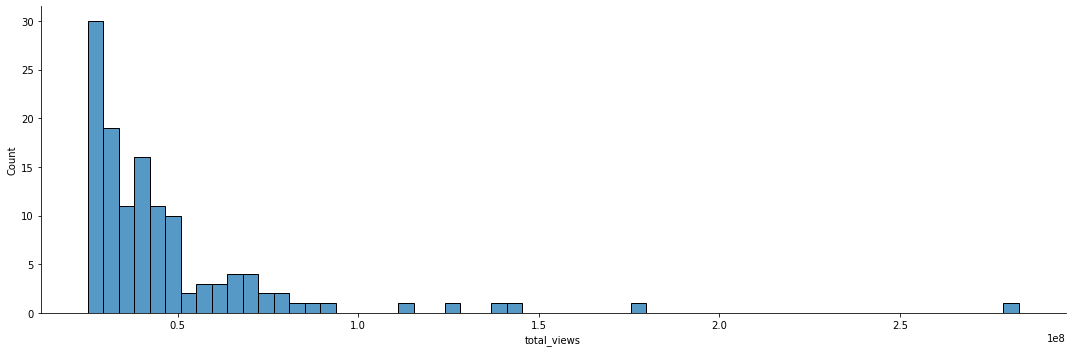

In [20]:
sns.displot(df_gt_25mil, x="total_views", kind="hist", aspect=3, bins=60)

Buat histogram plot dari duration_seconds:

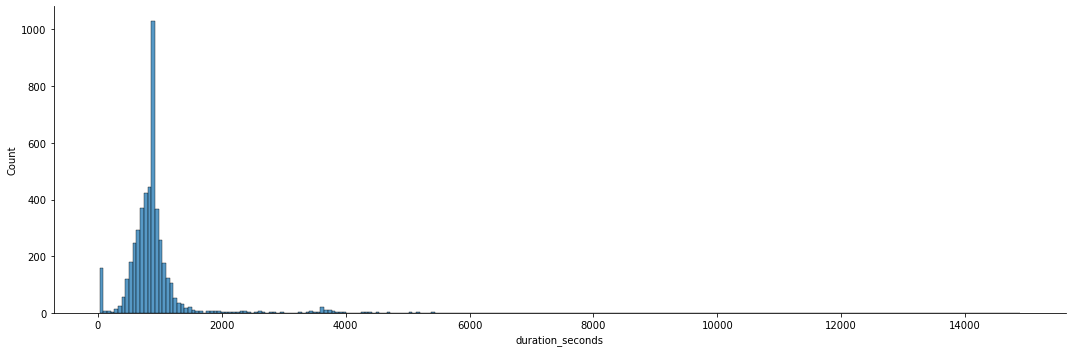

In [49]:
sns.displot(df_lt_25mil, x="duration_seconds", kind="hist", aspect=3, bins=250)

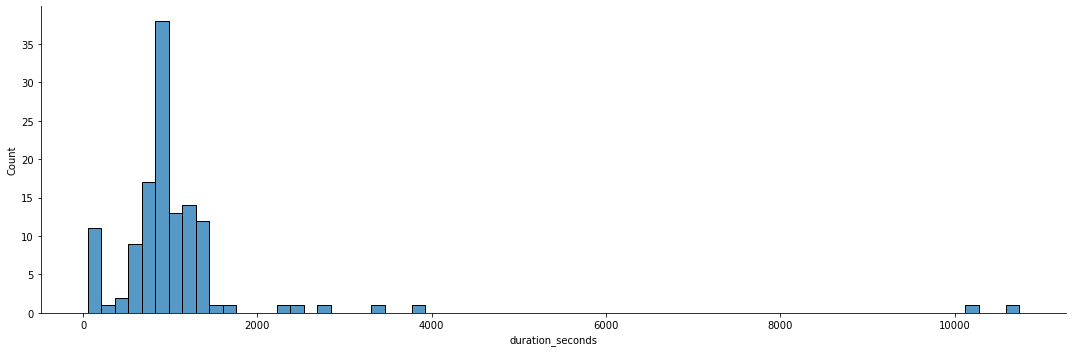

In [27]:
sns.displot(df_gt_25mil, x="duration_seconds", kind="hist", aspect=3)

Plot histogram dari num_words

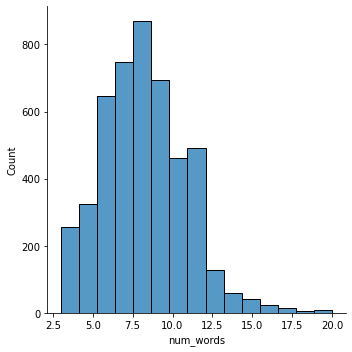

In [29]:
sns.displot(df_lt_25mil, x="num_words", kind="hist", bins=15)

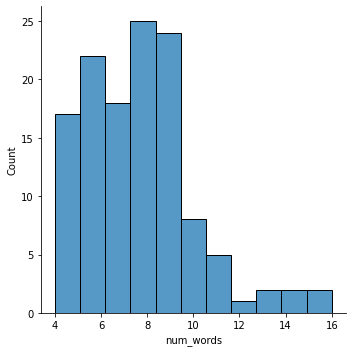

In [41]:
sns.displot(df_gt_25mil, x="num_words", kind="hist", aspect=3)

Plot histogram dari num_chars

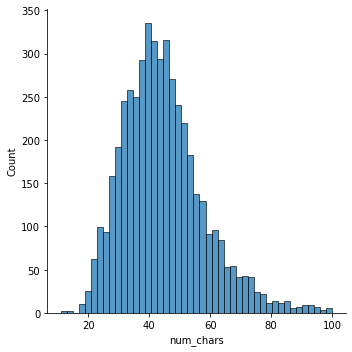

In [49]:
sns.displot(df_lt_25mil, x="num_chars", kind="hist", aspect=1)

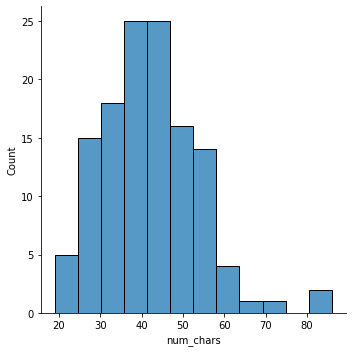

In [50]:
sns.displot(df_gt_25mil, x="num_chars", kind="hist", aspect=1)

Lalu data diurutkan berdasarkan frekuensinya:

In [50]:
(np.floor((df["total_views"] / 10000)) * 10000).value_counts()

430000.00      37
370000.00      34
420000.00      34
500000.00      33
380000.00      33
               ..
7890000.00      1
9560000.00      1
69880000.00     1
8310000.00      1
5050000.00      1
Name: total_views, Length: 1278, dtype: int64

<AxesSubplot:>

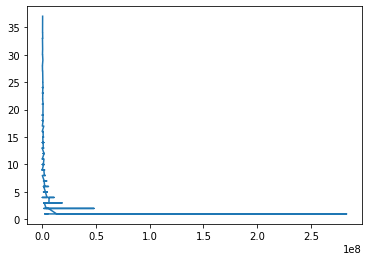

In [47]:
(np.floor((df["total_views"] / 10000)) * 10000).value_counts().plot()

In [51]:
(np.floor((df["total_views"] / 10000)) * 10000).value_counts()

430000.00      37
370000.00      34
420000.00      34
500000.00      33
380000.00      33
               ..
7890000.00      1
9560000.00      1
69880000.00     1
8310000.00      1
5050000.00      1
Name: total_views, Length: 1278, dtype: int64

<AxesSubplot:>

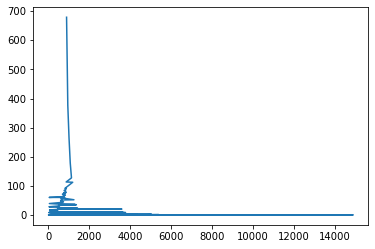

In [61]:
(np.floor((df["duration_seconds"] / 10)) * 10).value_counts().plot()

Buat pie chart untuk menunjukkan berapa persen video yang memiliki angka dalam judulnya

<AxesSubplot:ylabel='title'>

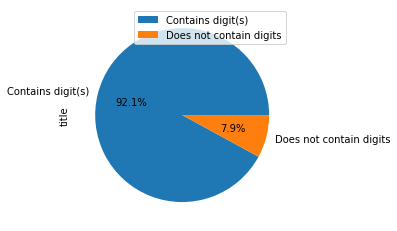

In [122]:
df_gt_25mil.groupby("contain_digits").count().plot.pie(y="title", autopct='%1.1f%%')

<AxesSubplot:ylabel='title'>

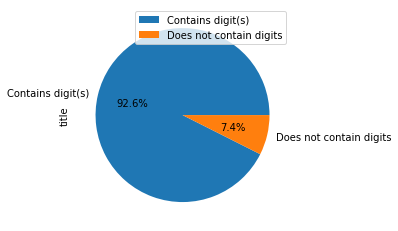

In [123]:
df_lt_25mil.groupby("contain_digits").count().plot.pie(y="title", autopct='%1.1f%%')

Buat pie chart untuk menunjukkan berapa persen video yang diawali angka di judulnya

<AxesSubplot:ylabel='title'>

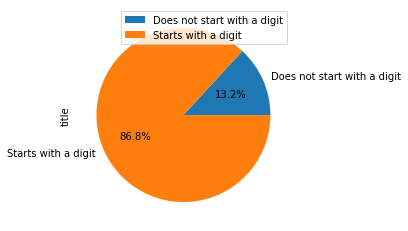

In [120]:
df_lt_25mil.groupby("startswith_digits").count().plot.pie(y="title", autopct='%1.1f%%')

<AxesSubplot:ylabel='title'>

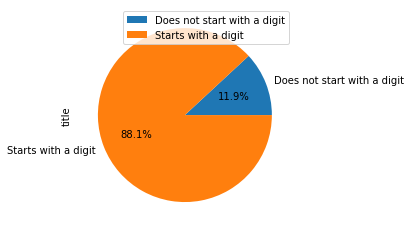

In [121]:
df_gt_25mil.groupby("startswith_digits").count().plot.pie(y="title", autopct='%1.1f%%')

Buat boxplot untuk durasi video:

<AxesSubplot:xlabel='duration_seconds'>

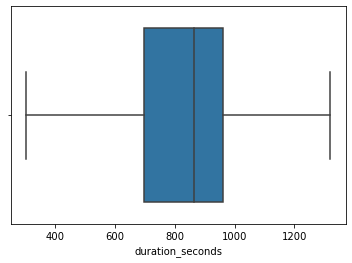

In [125]:
sns.boxplot(x=df_lt_25mil["duration_seconds"], showfliers=False)

<AxesSubplot:xlabel='duration_seconds'>

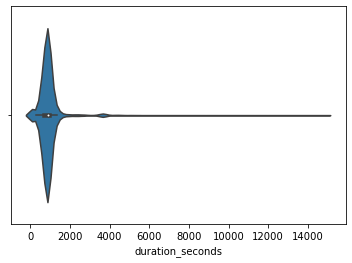

In [127]:
sns.violinplot(x=df_lt_25mil["duration_seconds"])

<AxesSubplot:xlabel='duration_seconds'>

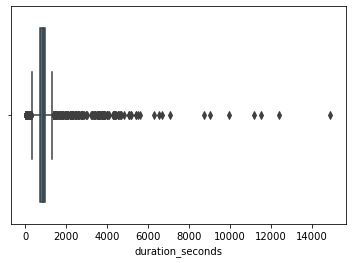

In [17]:
sns.boxplot(x=df_lt_25mil["duration_seconds"], showfliers=True)

<AxesSubplot:xlabel='duration_seconds'>

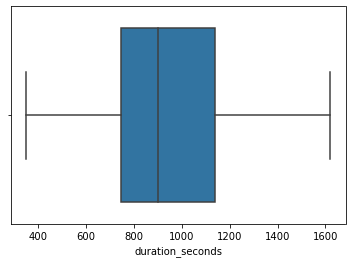

In [14]:
sns.boxplot(x=df_gt_25mil["duration_seconds"], showfliers=False)

<AxesSubplot:xlabel='duration_seconds'>

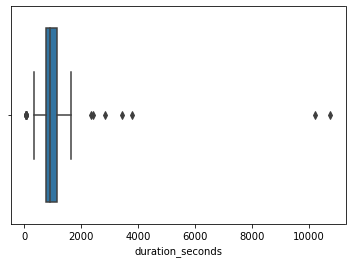

In [18]:
sns.boxplot(x=df_gt_25mil["duration_seconds"], showfliers=True)

Video dengan penonton paling banyak (sekitar 280,000,000 penonton) memiliki durasi dan panjang title yang umum digunakan oleh 5-Minute Crafts.
Meskipun nama channelnya adalah 5-Minute Crafts, durasi video yang mereka upload umumnya lebih panjang dari 5 menit.
Hanya sedikit video yang memiliki judul yang lebih panjang dari 12 kata dan memiliki jumlah penonton lebih dari 10 juta orang.
Kami menduga ada hubungan antara panjang judul dan jumlah penonton. Makin panjang suatu judul video, semakin dikit yang menonton.